<a href="https://colab.research.google.com/github/mugesram/Point-Operations-Spatial-Filtering/blob/main/Assignment_1_vision-Q9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

indensity transformation

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import color

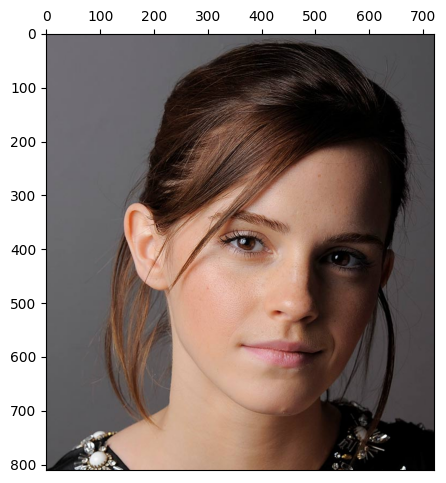

In [ ]:
# Reading Image
image = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/emma.jpg")

fix,ax = plt.subplots(1,1,figsize=(5,8))
ax.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()

256


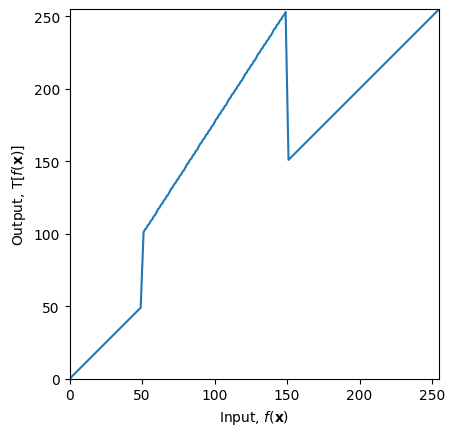

In [ ]:
# Making transform function
t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,101)
t3 = np.linspace(150,255,106)
t1[-1] = (t1[-1] + t2[0])/2
t2 = np.delete(t2,0)
t2[-1] = (t2[-1] + t3[0])/2
t3 = np.delete(t3,0)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

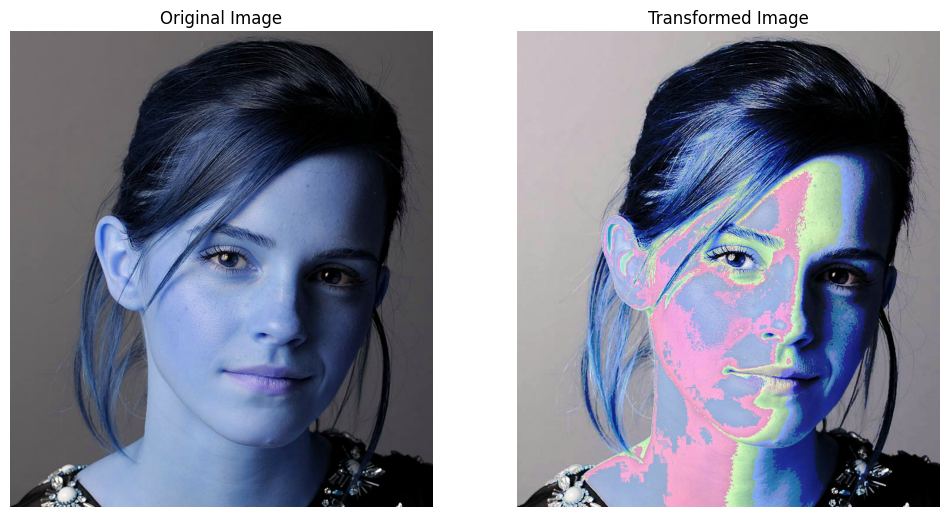

In [ ]:
# implementing transformation
transformed_image = cv.LUT(image, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('Transformed Image')
for a in ax:
    a.axis('off')
plt.show()

Brain Image Analysis

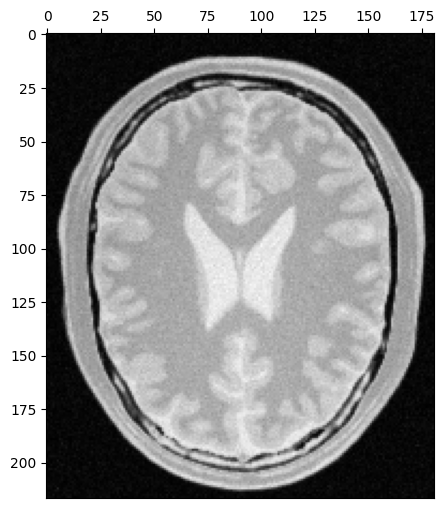

(217, 181, 3)

In [ ]:
# Reading Image
image = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/brain_proton_density_slice.png")

fix,ax = plt.subplots(1,1,figsize=(5,8))
cvt_img = cv.cvtColor(image,cv.COLOR_BGR2RGB)
ax.imshow(cvt_img)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()
cvt_img.shape


In [ ]:
# need to find intensity ranges of each matters
# finding Idensity range of grey matters
min = 255
max = 0
total = np.uint32(0)
n = 0
for i in range(110,120):
  for j in range(50,55):
    v = np.uint32(cvt_img[i][j][0])
    total += v
    n += 1
    if min > v:
      min = v
    if max < v:
      max = v
print(min,max)
print(total/n)

158 191
169.4


In [ ]:
# finding Indensity range of white matters
min = 255
max = 0
total = np.uint32(0)
n = 0
for i in range(50,55):
  for j in range(45,50):
    v = np.uint32(cvt_img[i][j][0])
    total += v
    n += 1
    if min > v:
      min = v
    if max < v:
      max = v
print(min,max)
print(total/n)

168 192
180.76


In [ ]:
cvt_img[100][75]

array([230, 230, 230], dtype=uint8)

white matters 180-200, grey matter 150-175

In [ ]:
# accentuating white matter
lb = 150
ub = 175
t1 = np.array([0]*lb)
t2 = np.linspace(lb,ub,ub-lb)
t3 = np.array([0]*(256-ub))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

256


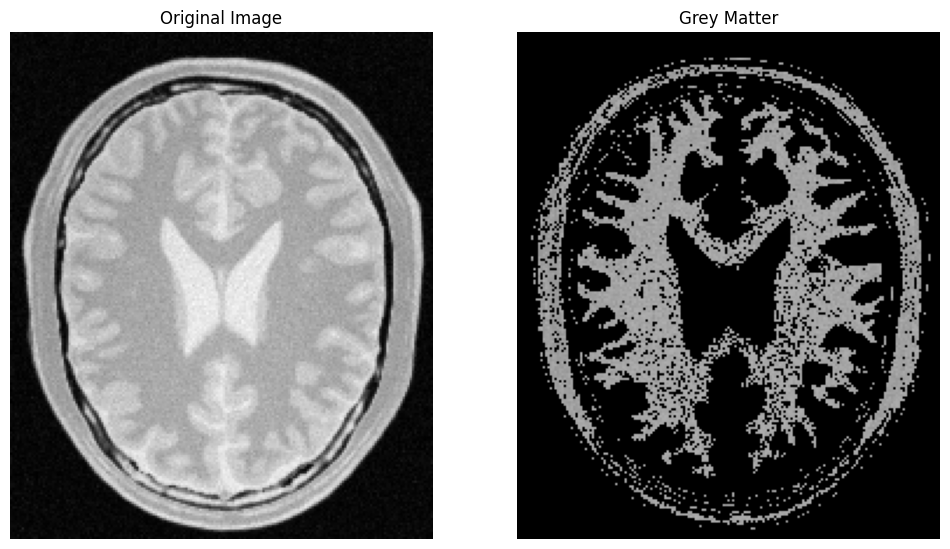

In [ ]:
transformed_image = cv.LUT(cvt_img, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cvt_img)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('Grey Matter')
for a in ax:
    a.axis('off')
plt.show()

In [ ]:
# accentuating grey matter
lb = 180
ub = 210
t1 = np.array([0]*lb)
t2 = np.linspace(lb,ub,ub-lb)
t3 = np.array([0]*(256-ub))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

256


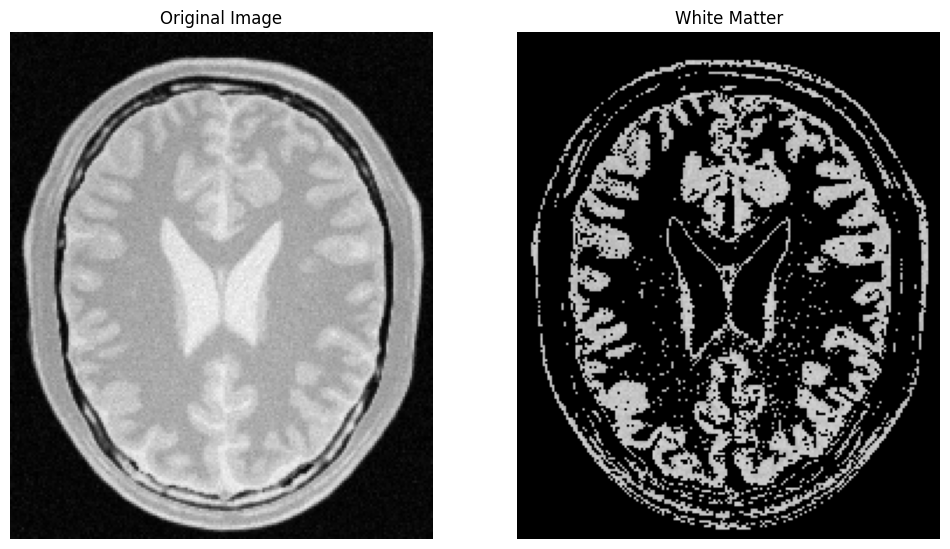

In [ ]:
transformed_image = cv.LUT(cvt_img, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cvt_img)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('White Matter')
for a in ax:
    a.axis('off')
plt.show()

Final Range After Test  :   white matters 180-210, grey matter 150-175

Gamma Correction

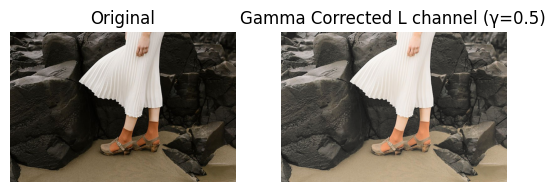

In [ ]:
def gamma_correction_Lab(image, gamma=0.5):
  # norm of the img
    img_float = image / 255.0

    # L range 0,100
    lab = color.rgb2lab(img_float)

    # get L channel
    L = lab[:, :, 0]

    L_norm = L / 100.0
    L_corrected = np.power(L_norm, gamma)
    lab[:, :, 0] = L_corrected * 100
    rgb_corrected = color.lab2rgb(lab)
    rgb_corrected = np.clip(rgb_corrected, 0, 1)
    rgb_corrected_uint8 = (rgb_corrected * 255).astype(np.uint8)

    return rgb_corrected_uint8


image_bgr = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/highlights_and_shadows.jpg")

image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)


gamma_val = 0.5
corrected_image = gamma_correction_Lab(image_rgb, gamma=gamma_val)


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected L channel (γ={gamma_val})')
plt.imshow(corrected_image)
plt.axis('off')

plt.show()


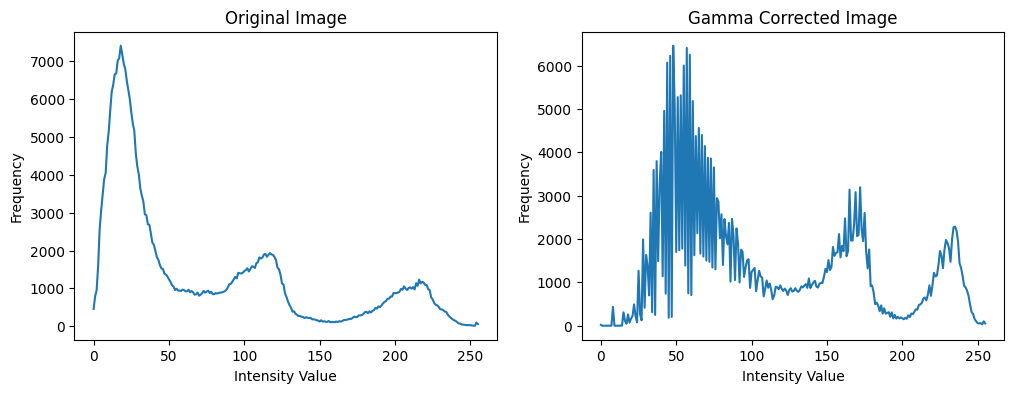

In [ ]:
corrected_gray = cv.cvtColor(corrected_image, cv.COLOR_RGB2GRAY)
original_gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)
hist_cr, bins_cr = np.histogram(corrected_gray.ravel(), 256, [0, 256])
hist_or, bins_or = np.histogram(original_gray.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(hist_or)
ax[0].set_title('Original Image')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist_cr)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

White ness off Corrected picture increased because of the use of y=0.5 in maps the naroow dark band to wider range show small chnage in higher intensity . sudden reduction in lower intensity and increse in higher intensity pixels.

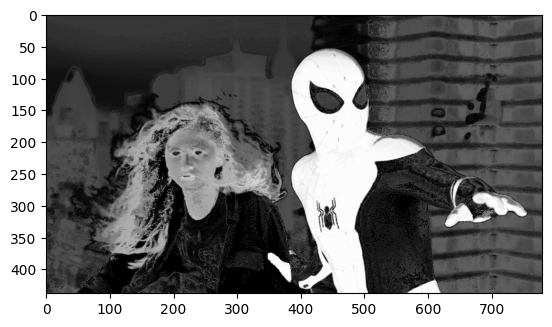

In [ ]:
# HSV intensity transformation - 4
image_bgr = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/spider.png')
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

hsv_image = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Split into channels
h, s, v = cv.split(hsv_image)
a = 0.55

x = np.arange(256)
t = x + a * 128 * np.exp(-((x - 128)**2) / (2 * 70 * 70))
t = np.clip(t, 0, 255).astype(np.uint8)

s_tr = cv.LUT(s, t)
plt.imshow(s_tr, cmap='gray')

array([[[161, 190, 205],
        [163, 188, 203],
        [161, 188, 204],
        ...,
        [ 95, 113, 122],
        [ 89, 109, 120],
        [ 84, 106, 118]],

       [[160, 192, 211],
        [160, 192, 211],
        [160, 192, 211],
        ...,
        [ 84, 101, 108],
        [ 83,  98, 104],
        [ 80,  94, 104]],

       [[160, 192, 211],
        [160, 192, 211],
        [160, 192, 211],
        ...,
        [ 65,  79,  90],
        [ 65,  78,  87],
        [ 66,  76,  83]],

       ...,

       [[ 58,  60,  69],
        [ 58,  61,  68],
        [ 55,  61,  71],
        ...,
        [ 36,  45,  55],
        [ 36,  45,  55],
        [ 35,  46,  56]],

       [[ 50,  57,  67],
        [ 49,  56,  66],
        [ 53,  57,  65],
        ...,
        [ 33,  42,  52],
        [ 32,  41,  51],
        [ 33,  42,  52]],

       [[ 46,  53,  64],
        [ 50,  52,  60],
        [ 43,  52,  61],
        ...,
        [ 31,  40,  50],
        [ 31,  40,  50],
        [ 31,  40,  50]]], dtype=uint8)
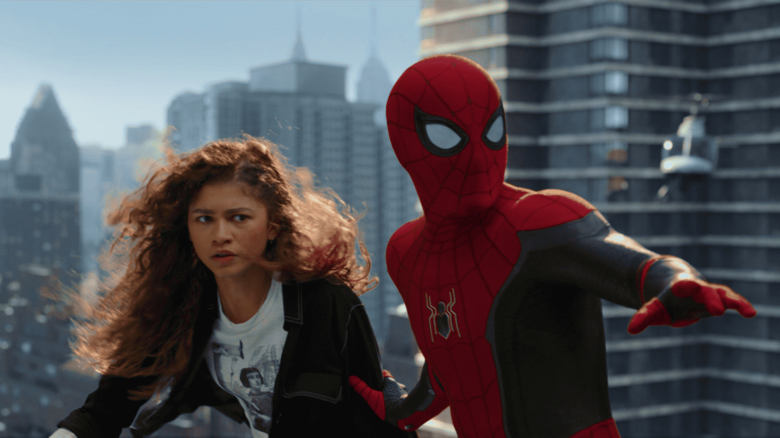

In [ ]:
hsv_merged = cv.merge((h, s_tr, v))

rgb_merged = cv.cvtColor(hsv_merged, cv.COLOR_HSV2RGB)
rgb_merged


array([[[182, 197, 205],
        [182, 195, 203],
        [182, 196, 204],
        ...,
        [107, 117, 122],
        [103, 114, 120],
        [ 99, 111, 118]],

       [[184, 201, 211],
        [184, 201, 211],
        [184, 201, 211],
        ...,
        [ 95, 104, 108],
        [ 93, 101, 104],
        [ 91,  99, 104]],

       [[184, 201, 211],
        [184, 201, 211],
        [184, 201, 211],
        ...,
        [ 76,  84,  90],
        [ 75,  82,  87],
        [ 74,  79,  83]],

       ...,

       [[ 64,  65,  69],
        [ 64,  65,  68],
        [ 63,  66,  71],
        ...,
        [ 44,  49,  55],
        [ 44,  49,  55],
        [ 44,  50,  56]],

       [[ 58,  62,  67],
        [ 57,  61,  66],
        [ 59,  61,  65],
        ...,
        [ 41,  46,  52],
        [ 40,  45,  51],
        [ 41,  46,  52]],

       [[ 54,  58,  64],
        [ 55,  56,  60],
        [ 51,  56,  61],
        ...,
        [ 39,  44,  50],
        [ 39,  44,  50],
        [ 39,  44,  50]]], dtype=uint8)
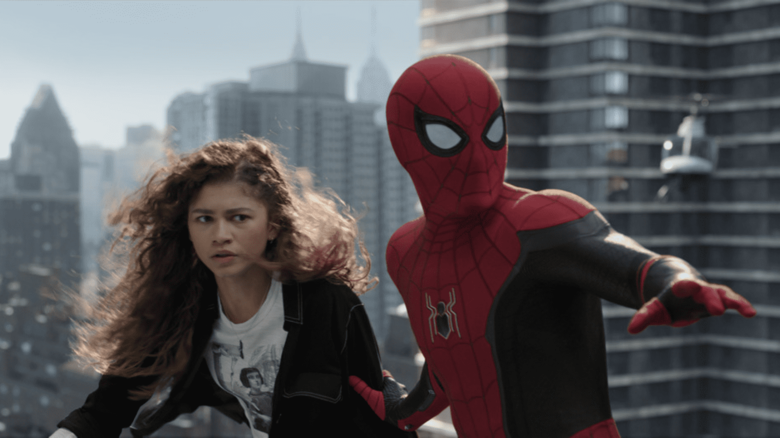

In [ ]:
image_rgb

After testing a = 0.55 makes image looks more pleasing

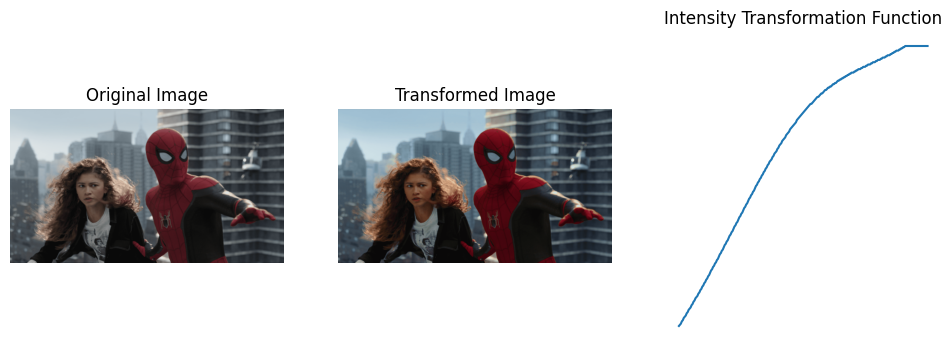

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(rgb_merged)
ax[1].set_title('Transformed Image')
ax[2].plot(t)
ax[2].set_title('Intensity Transformation Function')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
for a in ax:
    a.axis('off')
plt.show()

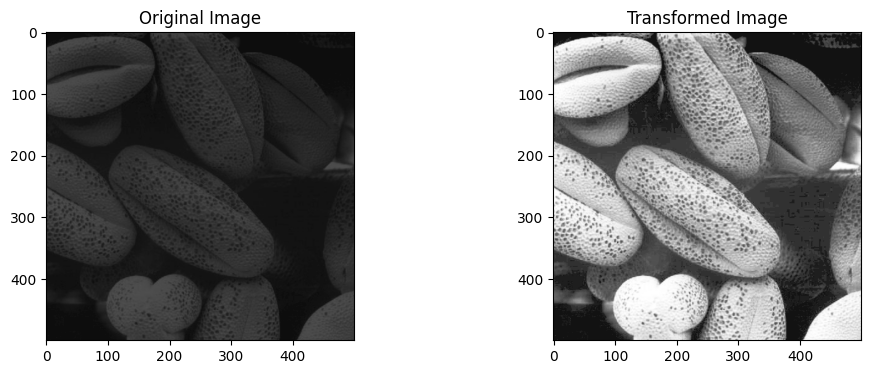

In [ ]:
# Q5
image_bgr = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/shells.tif')
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)


hist = cv.calcHist([image_rgb], [0], None, [256], [0, 256])
hist = hist.flatten()


cdf = hist.cumsum()
L= 256
M = image_rgb.shape[0]
N = image_rgb.shape[1]
k = ((L-1)/(M*N))
t = np.array([k*cdf[i] for i in range(256)])
t = np.rint(t).astype('uint8')
transformed_img = cv.LUT(image_rgb, t)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_img)
ax[1].set_title('Transformed Image')
plt.show()


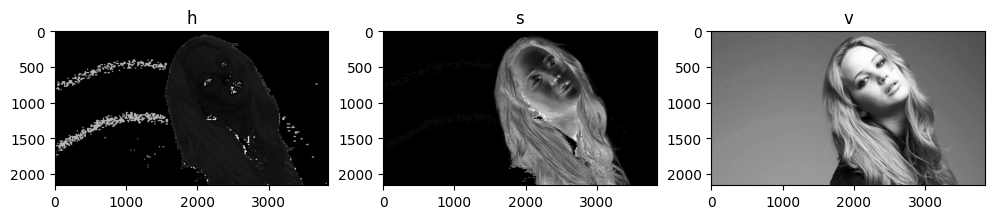

In [ ]:
# Q6

# HSV intensity transformation - 4
image_bgr = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/jeniffer.jpg')
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

hsv_image = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Split into channels
h, s, v = cv.split(hsv_image)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(h,cmap="grey")
ax[0].set_title('h')
ax[1].imshow(s,cmap="grey")
ax[1].set_title('s')
ax[2].imshow(v,cmap="grey")
ax[2].set_title('v')
plt.show()


best plane is s plane for thresholding.

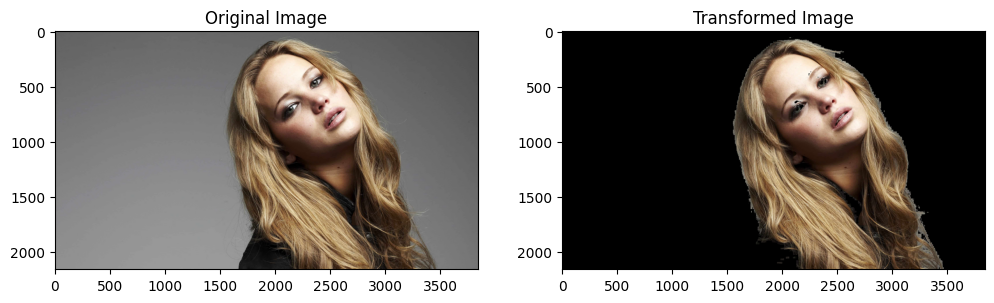

In [ ]:
# after testing fixed to a threshold of -------------------------------- 14
_, mask = cv.threshold(s, 14, 255, cv.THRESH_BINARY)


foreground = cv.bitwise_and(image_rgb, image_rgb, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(foreground)
ax[1].set_title('Transformed Image')
plt.show()

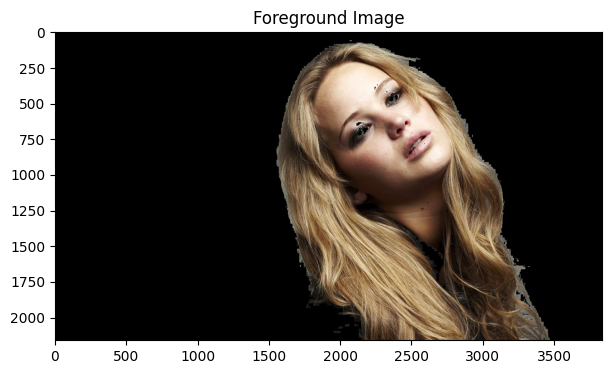

In [ ]:
hist = cv.calcHist([foreground], [0], None, [256], [0, 256])
hist = hist.flatten()


cdf = hist.cumsum()
L= 256
M = foreground.shape[0]
N = foreground.shape[1]
k = ((L-1)/(M*N))
t = np.array([k*cdf[i] for i in range(256)])
t = np.rint(t).astype('uint8')
transformed_img = cv.LUT(foreground, t)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.imshow(foreground)
ax.set_title('Foreground Image')
plt.show()

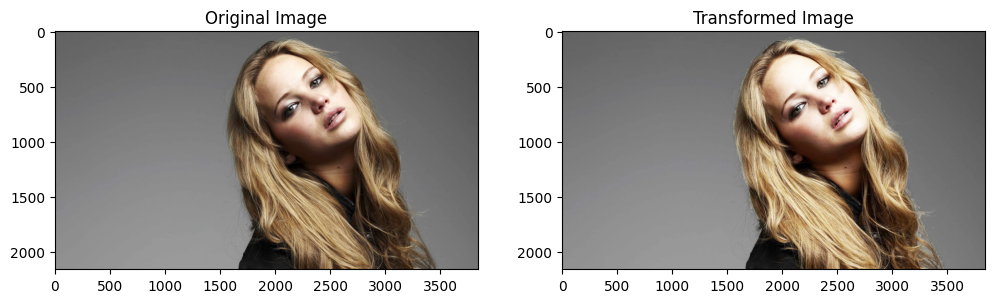

In [ ]:
foreground_pixels = image_rgb[mask == 255]
hist, bins = np.histogram(foreground_pixels, bins=256, range=[0,256])

cdf = hist.cumsum()
L= 256
M = foreground_pixels.shape[0]
N = foreground_pixels.shape[1]
k = ((L-1)/(M*N))

t = np.array([k*cdf[i] for i in range(256)])
t = np.rint(t).astype('uint8')
transformed_pixels = cv.LUT(foreground_pixels, t)

new_img = image_rgb.copy()
new_img[mask == 255] = transformed_pixels

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(new_img)
ax[1].set_title('Transformed Image')
plt.show()


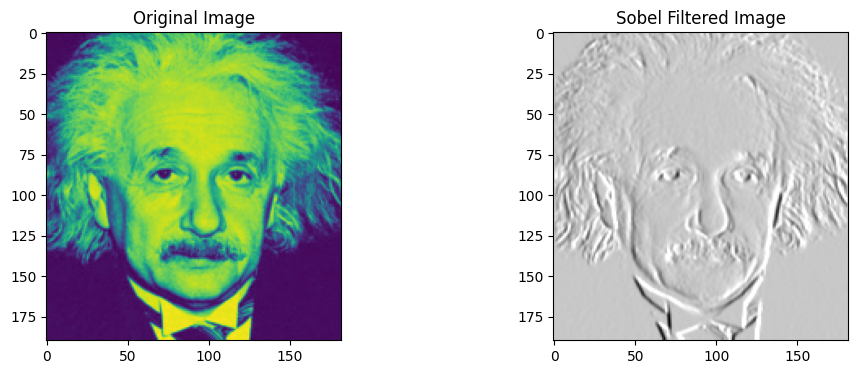

In [25]:
# SOBEL FILTERING - Q7

image_gray = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/einstein.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernal = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]],dtype=np.float32)
sobel_img_cv = cv.filter2D(image_gray, cv.CV_64F, kernal)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(image_gray)
ax[0].set_title('Original Image')
ax[1].imshow(sobel_img_cv, cmap="gray",vmax=255)
ax[1].set_title('Sobel Filtered Image')
plt.show()


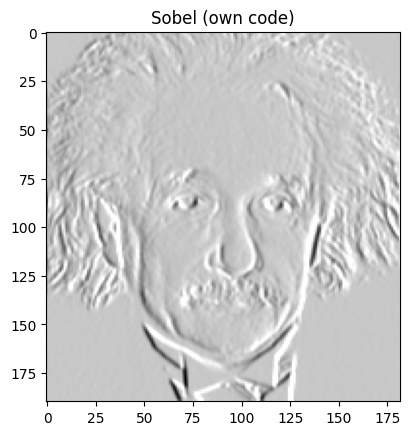

In [27]:
def conv2d(image, kernel):
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)

    return output

sobel_img_own = conv2d(image_gray, kernal)

plt.imshow(sobel_img_own, cmap='gray',vmax=255)
plt.title("Sobel (own code)")
plt.show()


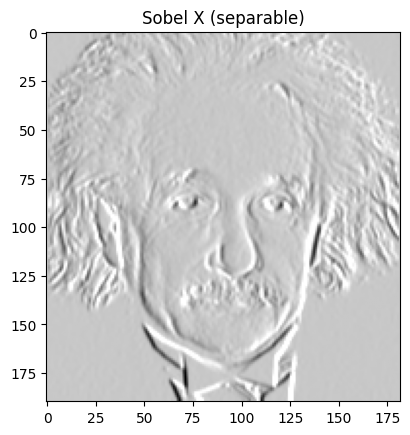

In [28]:

x = np.array([1, 0, -1], dtype=np.float32)  # horizontal
y = np.array([1, 2, 1], dtype=np.float32)   # vertical


temp = cv.filter2D(image_gray, cv.CV_64F, y[:, None])  # column vector


sobel_img_sep = cv.filter2D(temp, cv.CV_64F, x[None, :])  # row vector

plt.imshow(sobel_img_sep, cmap='gray',vmax=255)
plt.title("Sobel X (separable)")
plt.show()

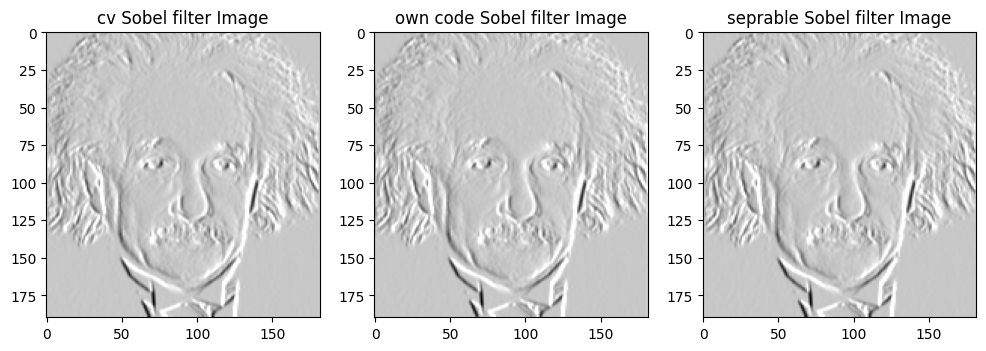

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(sobel_img_cv, cmap="gray",vmax=255)
ax[0].set_title('cv Sobel filter Image')
ax[1].imshow(sobel__img_own, cmap="gray",vmax=255)
ax[1].set_title('own code Sobel filter Image')
ax[2].imshow(sobel_img_sep, cmap="gray",vmax=255)
ax[2].set_title('seprable Sobel filter Image')
plt.show()

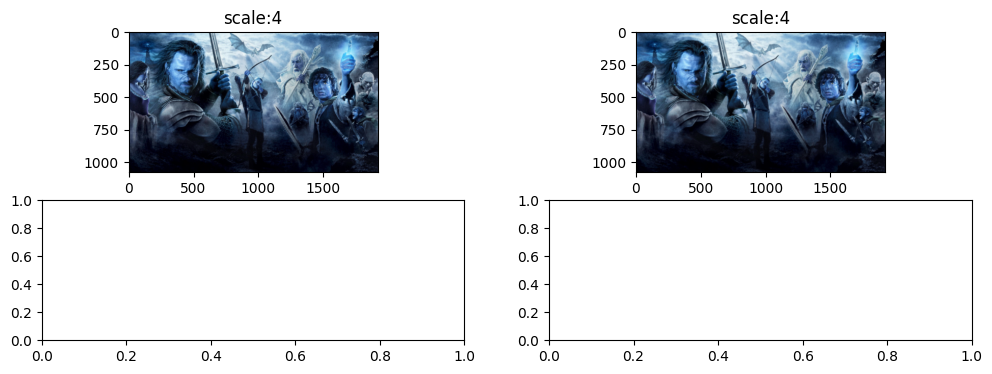

In [3]:
import math


def zoom(img, s, method="nearest"):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    zoomed = np.zeros((new_h, new_w, img.shape[2] if img.ndim == 3 else 1), dtype=np.uint8)

    for y in range(new_h):
        for x in range(new_w):
            orig_x = x / s
            orig_y = y / s

            if method == "nearest":
                nx = int(round(orig_x))
                ny = int(round(orig_y))
                nx = min(nx, w - 1)
                ny = min(ny, h - 1)
                zoomed[y, x] = img[ny, nx]

            elif method == "bilinear":
                x0 = int(np.floor(orig_x))
                x1 = min(x0 + 1, w - 1)
                y0 = int(np.floor(orig_y))
                y1 = min(y0 + 1, h - 1)

                dx = orig_x - x0
                dy = orig_y - y0

                top = (1 - dx) * img[y0, x0] + dx * img[y0, x1]
                bottom = (1 - dx) * img[y1, x0] + dx * img[y1, x1]
                pixel_value = (1 - dy) * top + dy * bottom
                zoomed[y, x] = pixel_value
            else:
                raise ValueError("Unknown method")

    if zoomed.shape[2] == 1:
        zoomed = zoomed[:, :, 0]
    return zoomed

image = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/im01small.png',cv.COLOR_BGR2RGB)  # Load your image
image_zoomed = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/im01.png',cv.COLOR_BGR2RGB)
scale_factor = 4

zoom_nearest = zoom(image, scale_factor, method="nearest")
zoom_bilinear = zoom(image, scale_factor, method="bilinear")




fig, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0][0].imshow(zoom_nearest)
ax[0][0].set_title(f"scale:{scale_factor}")
ax[0][1].imshow(zoom_bilinear)
ax[0][1].set_title(f"scale:{scale_factor}")
plt.show()



In [6]:

def normalized_ssd(img1, img2):

    diff = (img1.astype(np.float32) - img2.astype(np.float32)) ** 2
    return np.sum(diff) / diff.size

# Load images
orig = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/im01small.png", cv.IMREAD_COLOR)
orig_zoom = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/im01.png", cv.IMREAD_COLOR)


# Scale-up small images by factor of 4 (bilinear)
scale_factor = 4
zoom_bilinear = zoom(orig, scale_factor, method="bilinear")
# Compute normalized SSD
ssd1 = normalized_ssd(zoom_bilinear, orig_zoom)


print(f"Normalized SSD for Image 1: {ssd1:.4f}")


Normalized SSD for Image 1: 200.2450


In [10]:

def pad_to_shape(img, target_shape):
    """Pad img with zeros to match target_shape (height, width, channels)."""
    h, w = img.shape[:2]
    th, tw = target_shape[:2]

    pad_h = th - h
    pad_w = tw - w


    pad = ((0, pad_h), (0, pad_w))
    if img.ndim == 3:
        pad += ((0, 0),)

    padded_img = np.pad(img, pad, mode='constant', constant_values=0)
    return padded_img

def normalized_ssd(img1, img2):

    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    th = max(h1, h2)
    tw = max(w1, w2)

    img1_pad = pad_to_shape(img1, (th, tw) + img1.shape[2:])
    img2_pad = pad_to_shape(img2, (th, tw) + img2.shape[2:])

    diff = (img1_pad.astype(np.float32) - img2_pad.astype(np.float32)) ** 2
    return np.sum(diff) / diff.size

for i in range(1,4):
  orig = cv.imread(f"/content/drive/MyDrive/Vision/Assignment-1/im0{i}small.png", cv.IMREAD_COLOR)
  orig_zoom = cv.imread(f"/content/drive/MyDrive/Vision/Assignment-1/im0{i}.png", cv.IMREAD_COLOR)



  scale_factor = 4
  zoom_bilinear = zoom(orig, scale_factor, method="bilinear")

  ssd1 = normalized_ssd(zoom_bilinear, orig_zoom)


  print(f"Normalized SSD for Image {i}: {ssd1:.4f}")

Normalized SSD for Image 1: 200.2450
Normalized SSD for Image 2: 48.9606
Normalized SSD for Image 3: 107.4616


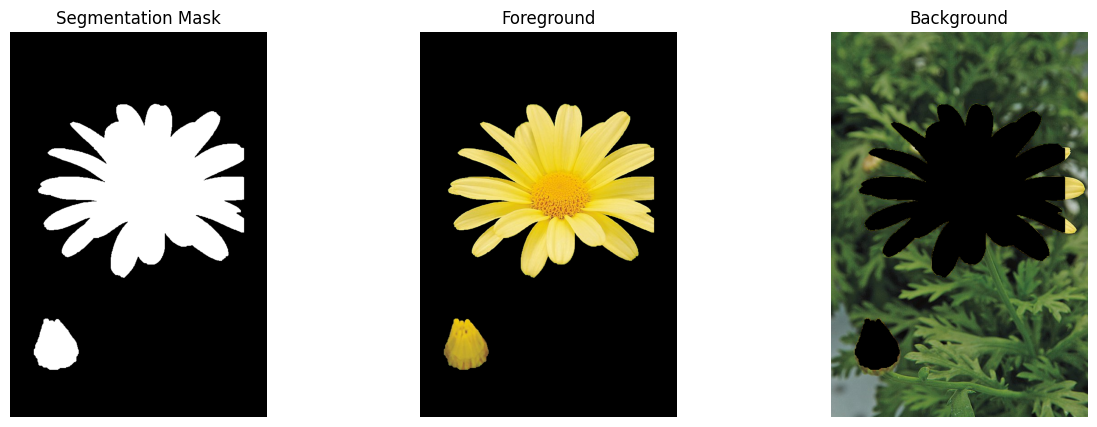

In [19]:

img = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/daisy.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


mask = np.zeros(img.shape[:2], np.uint8)

rect = (50, 50, img.shape[1]-100, img.shape[0]-100)


bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)


cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)


mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')


foreground = img * mask2[:, :, np.newaxis]
background = img * (1 - mask2[:, :, np.newaxis])


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Segmentation Mask')
plt.imshow(mask2, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Foreground')
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Background')
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

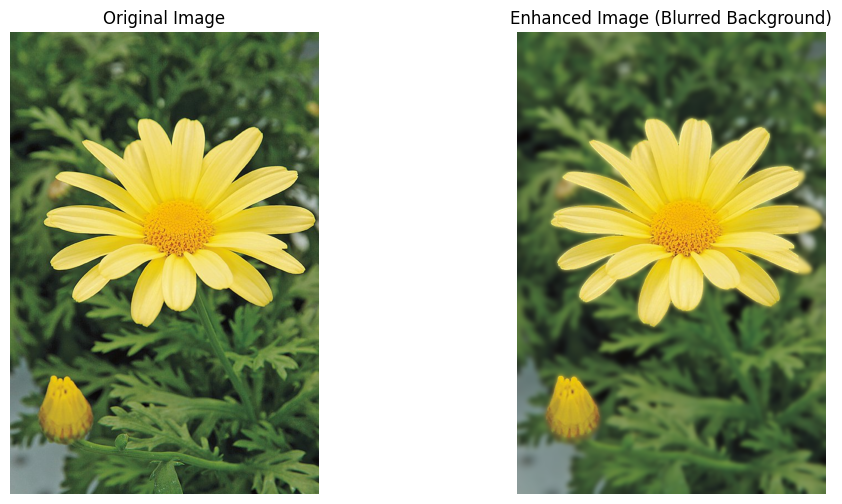

In [20]:
blurred_background = cv.GaussianBlur(img, (21, 21), 0)


enhanced_img = blurred_background.copy()
enhanced_img[mask2 == 1] = img[mask2 == 1]


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Enhanced Image (Blurred Background)')
plt.imshow(cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

This happens because the GrabCut mask often marks pixels just outside the foreground (flower edges) as probable background (or uncertain). When you replace the background pixels with the blurred background image, these edge pixels near the foreground may contain some "leftover" dark or shadow details from the original image or because the blurred background includes dark areas from the image.

Also, the transition between sharp foreground and blurred background may cause a noticeable dark boundary due to imperfect mask or color blending.